In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score
import statsmodels.api as sm



In [2]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS (TADEO)

EPH_T1=pd.read_excel("/Users/tadeo/Downloads/BASE NORMALIZADA.xlsx")

In [ ]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS (PABLO)

EPH_T1=pd.read_excel("C:/Users/Computador/Desktop/Facultad/Big Data/TP4/BASE NORMALIZADA.xlsx")

In [ ]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS (LEANDRO)

EPH_T1=pd.read_excel("/Users/HP/Desktop/Bases de datos tp4/BASE NORMALIZADA.xlsx")

# Afino las bases de datos a utilizar

In [4]:
EPH_T1.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
EPH_T1=EPH_T1[EPH_T1['REGION']==43]

In [ ]:
EPH_T1["ESTADO"].fillna(0, inplace=True)


norespondieron=EPH_T1[EPH_T1['ESTADO'] == 0]


respondieron=EPH_T1[EPH_T1['ESTADO'] != 0]
respondieron["desocupado"] = respondieron["ESTADO"].apply(lambda x: 1 if x == 2 else 0)
norespondieron["desocupado"] = norespondieron["ESTADO"].apply(lambda x: 1 if x == 2 else 0)
respondieron["PET"] = respondieron["CH06"].apply(lambda x: 1 if 15 <= x <= 65 else 0)
respondieron["PEA"] = respondieron["ESTADO"].apply(lambda x: 1 if x in [1, 2] else 0)

# A) Enfoque de validación

In [8]:
nor_04=norespondieron[norespondieron['ANO4']==2004]
nor_24=norespondieron[norespondieron['ANO4']==2024]
resp_04=respondieron[respondieron['ANO4']==2004]
resp_24=respondieron[respondieron['ANO4']==2024]

In [9]:
x04=resp_04.copy().drop(['desocupado', 'ESTADO'], axis=1)
y04=resp_04['desocupado']

# Split de testeo para 2004
X04_train, X04_test, y04_train, y04_test = train_test_split(x04, y04, test_size=0.3, random_state=444)

x24=resp_24.copy().drop(['desocupado','ESTADO'], axis=1)
y24=resp_24['desocupado']

# Split de testeo para 2024
X24_train, X24_test, y24_train, y24_test = train_test_split(x24, y24, test_size=0.3, random_state=444)



In [103]:
# Media de cada variable en el set de entrenamiento 2004
promedio_train04 = X04_train.mean(numeric_only=True)

# Media de cada variable en el set de testeo 2004
promedio_test04 = X04_test.mean(numeric_only=True)

# Media de cada variable en el set de entrenamiento 2024
promedio_train24 = X24_train.mean(numeric_only=True)

# Media de cada variable en el set de testeo 2024
promedio_test24 = X24_test.mean(numeric_only=True)

# Diferencia de medias
tabla_promedios04 = promedio_train04 - promedio_test04
# Diferencia de medias
tabla_promedios24 = promedio_train24 - promedio_test24

tabla_promedios = pd.concat([tabla_promedios04,tabla_promedios24],axis=1).rename(columns={0: 2004, 1:2024})

In [334]:
# Mostrar todas las columnas

tabla_promedios.T

,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH12,CH13,CH14,CH15,CH15_COD,CH16,CH16_COD,NIVEL_ED,CAT_OCUP,CAT_INAC,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,PP03C,PP03D,PP3E_TOT,PP3F_TOT,PP03H,PP03I,PP03J,INTENSI,PP04A,PP04B_COD,PP04B1,PP04B2,PP04B3_MES,PP04B3_ANO,PP04B3_DIA,PP04C,PP04C99,PP04D_COD,PP04G,PP05B2_MES,PP05B2_ANO,PP05B2_DIA,PP05C_1,PP05C_2,PP05C_3,PP05E,PP05F,PP05H,PP06A,PP06C,PP06D,PP06E,PP06H,PP07A,PP07C,PP07D,PP07E,PP07F1,PP07F2,PP07F3,PP07F4,PP07F5,PP07G1,PP07G2,PP07G3,PP07G4,PP07G_59,PP07H,PP07I,PP07J,PP07K,PP08D1,PP08D4,PP08F1,PP08F2,PP08J1,PP08J2,PP08J3,PP09A,PP09B,PP09C,PP10A,PP10C,PP10D,PP10E,PP11A,PP11B_COD,PP11B1,PP11B2_MES,PP11B2_ANO,PP11B2_DIA,PP11C,PP11C99,PP11D_COD,PP11G_ANO,PP11G_MES,PP11G_DIA,PP11L,PP11L1,PP11M,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T,P21,DECOCUR,IDECOCUR,RDECOCUR,GDECOCUR,PDECOCUR,ADECOCUR,TOT_P12,P47T,DECINDR,IDECINDR,RDECINDR,GDECINDR,PDECINDR,ADECINDR,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,ITF,DECIFR,IDECIFR,RDECIFR,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,EDAD2,EDUC,SALARIO_SEMANAL,HORASTRAB,PET,PEA
2004,0.000873,0.010267,0.0,0.0,0.0,0.0,0.266545,-3.600174,-0.033323,-0.005255,0.137801,0.007997,-0.117579,-0.002110,0.000289,-0.010212,-0.006684,0.436751,0.013039,-1.640242,0.000877,6.334934,0.004605,-0.014898,-0.008936,0.019402,0.021474,-0.000771,0.010819,0.026679,-0.024906,0.001498,-0.004341,0.264069,0.002002,0.000643,0.010943,-0.141750,1.209123,-0.089012,-0.023469,0.016517,0.005664,0.032793,0.001870,-84.444296,0.0,-0.094356,1.503692,2.103811,4.411765,0.458871,-0.056894,682.239077,-0.006417,-0.015873,2.590909,8.0,-0.071578,-0.072882,0.007857,-0.002625,0.003827,0.048372,0.014269,38.155697,4.946827,0.153988,-0.085990,0.033873,0.045544,-0.007223,-0.030175,0.006413,0.013974,-0.007391,0.012360,0.0,-0.020052,-0.017562,-0.007880,-0.015968,0.0,-0.022562,0.023877,0.051513,0.011919,-7.478061,9.797757,-10.485259,-41.415205,-40.243463,69.871795,110.000,NaN,0.008176,0.164502,-0.181122,-0.011330,0.025649,-0.291448,-0.021319,17.298464,0.005344,-0.877451,1.246032,2.166667,-0.791904,0.893939,-1733.682058,-1.049289,-0.547886,-2.984456,-0.218406,-0.057799,-0.078647,0.027661,-0.025226,0.322581,-0.109635,-0.037802,-0.023185,-0.000409,-1095.207359,-0.011574,-0.025302,-0.022432,0.021752,-0.062184,-0.020595,-71.783554,-12.049531,0.005908,0.006859,0.017231,0.059578,-0.121279,-0.006639,7.870445,-4782.500000,1406.800000,-16.740746,8.857931,-107.000000,-165.000000,-36.314815,-14.234202,-757.30,NaN,5.971169,-12.889941,-2.337532,0.031835,0.035008,0.035886,0.071913,-0.004379,0.031930,2.349252,0.030327,0.031469,0.035731,0.077214,-0.032589,0.032048,12.251855,-0.029421,-27.380184,0.548166,0.001671,0.004256
2024,-0.003667,-0.016185,0.0,0.0,0.0,0.0,-0.389350,3.375363,-0.024921,0.001839,-0.280993,-0.025330,0.037840,0.000477,-0.007076,-0.001838,-0.005623,0.088763,0.002513,-6.138066,-0.003658,-8.594828,-0.001268,0.022989,-0.067273,0.004393,0.039152,-0.017953,-0.011841,-0.027884,-0.047173,-0.019862,0.010313,0.365729,0.005825,0.001532,0.004381,-0.007697,0.170193,0.050044,0.026617,0.007987,0.007536,-0.035679,0.016136,-20.119531,0.0,-0.032335,0.079866,0.655507,3.366667,0.555323,-0.195793,1050.257441,-0.077300,2.333333,-0.333333,NaN,-0.022343,0.022095,0.038791,0.008576,0.016040,0.055658,-0.008838,-11648.465523,40914.605408,-0.124918,0.001295,0.065788,-0.036173,-0.497705,-0.123094,0.002615,-0.004780,0.000196,-0.002974,0.0,0.000298,0.002172,-0.004322,-0.006612,0.0,-0.005934,-0.049736,-0.027078,-0.023630,5720.216167,NaN,-47789.283081,3883.230769,15757.909342,36474.904762,-106501.125,NaN,0.000885,0.113636,0.068499,0.019371,0.005991,0.223416,-0.017505,-342.480025,-0.002795,-1.897059,0.125000,2.055556,0.173575,0.129730,2755.783019,1.647266,-0.138974,-0.661538,-0.703192,-0.048780,-0.028757,-0.041254,-0.461280,-0.146504,0.415385,-0.186459,-0.087680,-0.002525,2269.739027,-0.0

### En general, la división aleatoria entre los conjuntos de entrenamiento y testeo fue exitosa, ya que la mayoría de las variables muestran diferencias de medias cercanas a cero tanto en 2004 como en 2024. Sin embargo, hay algunas variables con diferencias de medias elevadas, posiblemente por la presencia de valores extremos o por una cuestión nominal (gracias al proceso inflacionario desde 2004 hasta 2024) que no tenemos en cuenta. 

# B) Metodo Supervisado 1: Modelo de Regresión Lineal

## Punto 2)

In [13]:
# Uno la base de entrenamiento
Training=pd.concat([X04_train, X24_train], ignore_index=True).fillna(0)

## MODELO 1

In [15]:
# Filtro las columnas que me interesan
X1= Training['CH06']
X1 = np.array(X1).reshape((-1, 1))
X1=sm.add_constant(X1) # agrego la columna de 1s
Y= Training['SALARIO_SEMANAL'].fillna(0) # Cuando no responden en P21 lo lleno con un 0
Y=np.array(Y)

In [16]:
model1= sm.OLS(Y,X1)
# Ajustamos el modelo
results1 = model1.fit()
print(results1.summary())
y1_pred = results1.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     452.1
Date:                Sat, 31 May 2025   Prob (F-statistic):           2.93e-99
Time:                        10:19:39   Log-Likelihood:            -2.0489e+05
No. Observations:               20442   AIC:                         4.098e+05
Df Residuals:                   20440   BIC:                         4.098e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1360.9577     70.446     19.319      0.0

## MODELO 2

In [18]:
X2=Training[['CH06','EDAD2']]
X2=sm.add_constant(X2) # Columna de 1s


In [19]:
model2= sm.OLS(Y,X2)
# Ajustamos el modelo
results2 = model2.fit()
print(results2.summary())
y2_pred = results2.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1674.
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        10:19:39   Log-Likelihood:            -2.0357e+05
No. Observations:               20442   AIC:                         4.071e+05
Df Residuals:                   20439   BIC:                         4.072e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2499.8706     98.075    -25.489      0.0

## MODELO 3

In [ ]:
Training['EDUC'].fillna(0, inplace=True) # A los valores NaN los relleno con 0s
X3=Training[['CH06','EDAD2','EDUC']]
X3=sm.add_constant(X3)


In [22]:
model3= sm.OLS(Y,X3)
# Ajustamos el modelo
results3 = model3.fit()
print(results3.summary())
y3_pred = results3.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        10:19:39   Log-Likelihood:            -2.0331e+05
No. Observations:               20442   AIC:                         4.066e+05
Df Residuals:                   20438   BIC:                         4.067e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2607.5716     96.959    -26.894      0.0

## MODELO 4

In [24]:
# Creo la variable dummy 'mujer'
Training.loc[(Training["CH04"] == 2), "mujer"] = 1
Training.loc[(Training["CH04"] != 2), "mujer"] = 0

X4=Training[['CH06','EDAD2','EDUC','mujer']]
X4=sm.add_constant(X4)

In [25]:
model4= sm.OLS(Y,X4)
# Ajustamos el modelo
results4 = model4.fit()
print(results4.summary())
y4_pred = results4.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1208.
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        10:19:39   Log-Likelihood:            -2.0295e+05
No. Observations:               20442   AIC:                         4.059e+05
Df Residuals:                   20437   BIC:                         4.059e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1674.0945    101.308    -16.525      0.0

## MODELO 5

In [27]:

X5=Training[['CH06','EDAD2','EDUC','mujer','HORASTRAB', 'PET']]
X5.fillna(0, inplace=True)

X5=sm.add_constant(X5)


C:\Users\tadeo\AppData\Local\Temp\ipykernel_25064\929346275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5.fillna(0, inplace=True)


In [28]:
model5= sm.OLS(Y,X5)
# Ajustamos el modelo
results5 = model5.fit()
print(results5.summary())
y5_pred = results5.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     1673.
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        10:19:39   Log-Likelihood:            -2.0103e+05
No. Observations:               20442   AIC:                         4.021e+05
Df Residuals:                   20435   BIC:                         4.021e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1062.9735     97.875    -10.861      0.0

## Punto 3. Enfoque de Validación:

In [30]:
# Realizo lo mismo que hice con las bases de entrenamiento pero aplicado a las de testeo
Test=pd.concat([X04_test, X24_test], ignore_index=True).fillna(0)
Y_test= Test['SALARIO_SEMANAL'].fillna(0)
Y_test=np.array(Y_test)

C:\Users\tadeo\AppData\Local\Temp\ipykernel_25064\4031380382.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test=pd.concat([X04_test, X24_test], ignore_index=True).fillna(0)


## MODELO 1

In [32]:
X1_test= Test['CH06']
X1_test = np.array(X1_test).reshape((-1, 1))
X1_test=sm.add_constant(X1_test)

In [33]:
Y1_test_pred =results1.predict(X1_test)
# Usando MSE testeo de scikit-learn
mse1_test = mean_squared_error(Y_test, Y1_test_pred)
print(mse1_test)

# También el RMSE y el MAE
rmse1_test = np.sqrt(mean_squared_error(Y_test, Y1_test_pred))
print(rmse1_test)

mae1_test = mean_absolute_error(Y_test, Y1_test_pred)
print(mae1_test)

28257253.49499502
5315.755213983712
3421.9202745930675


## MODELO 2

In [35]:
X2_test=Test[['CH06','EDAD2']]
X2_test=sm.add_constant(X2_test)

In [36]:
Y2_test_pred = results2.predict(X2_test)

mse2_test = mean_squared_error(Y_test, Y2_test_pred)
print(mse2_test)
rmse2_test = np.sqrt(mean_squared_error(Y_test, Y2_test_pred))
print(rmse2_test)
mae2_test = mean_absolute_error(Y_test, Y2_test_pred)
print(mae2_test)

24726123.78234307
4972.536956357697
3086.8870398987738


## MODELO 3

In [ ]:
Test['EDUC'].fillna(0, inplace=True)
X3_test=Test[['CH06','EDAD2','EDUC']]
X3_test=sm.add_constant(X3_test)

In [39]:
Y3_test_pred = results3.predict(X3_test)

mse3_test = mean_squared_error(Y_test, Y3_test_pred)
print(mse3_test)
rmse3_test = np.sqrt(mean_squared_error(Y_test, Y3_test_pred))
print(rmse3_test)
mae3_test = mean_absolute_error(Y_test, Y3_test_pred)
print(mae3_test)

23940168.0277587
4892.869099798062
3087.820088978243


## MODELO 4

In [41]:
Test.loc[(Test["CH04"] == 2), "mujer"] = 1
Test.loc[(Test["CH04"] != 2), "mujer"] = 0

X4_test=Test[['CH06','EDAD2','EDUC','mujer']]
X4_test=sm.add_constant(X4_test)

In [42]:
Y4_test_pred = results4.predict(X4_test)

mse4_test = mean_squared_error(Y_test, Y4_test_pred)
print(mse4_test)
rmse4_test = np.sqrt(mean_squared_error(Y_test, Y4_test_pred))
print(rmse4_test)
mae4_test = mean_absolute_error(Y_test, Y4_test_pred)
print(mae4_test)

23098062.38134764
4806.044359069903
3036.4287804516907


## MODELO 5

In [ ]:
X5_test=Test[['CH06','EDAD2','EDUC','mujer','HORASTRAB', 'PET']]
X5_test.fillna(0, inplace=True)

X5_test=sm.add_constant(X5_test)

In [47]:
Y5_test_pred = results5.predict(X5_test)

In [49]:
mse5_test = mean_squared_error(Y_test, Y5_test_pred)
print(mse5_test)
rmse5_test = np.sqrt(mean_squared_error(Y_test, Y5_test_pred))
print(rmse5_test)
mae5_test = mean_absolute_error(Y_test, Y5_test_pred)
print(mae5_test)

19078535.51258861
4367.89829467086
2312.586819567054


## Punto 4)

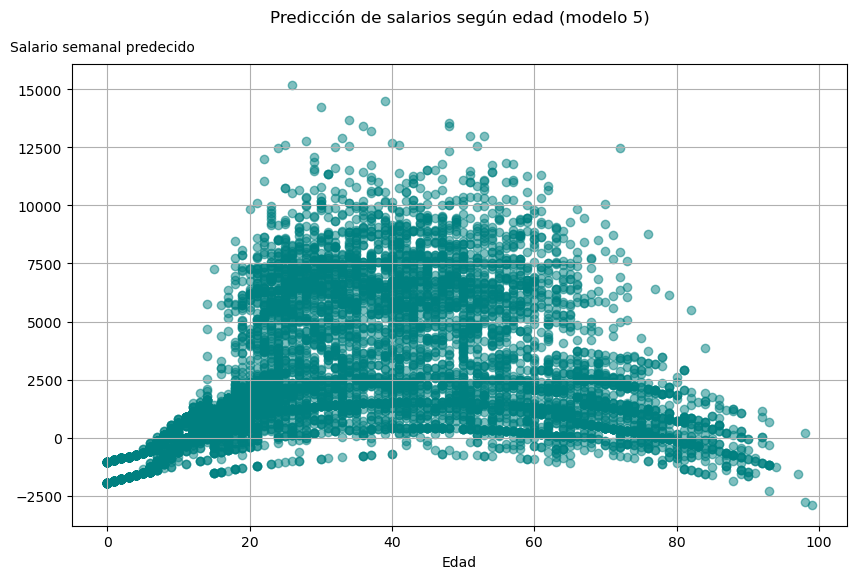

In [359]:
# Gráfico

import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de dispersión
ax.scatter(Test['CH06'], Y5_test_pred, alpha=0.5, color='teal')

# Etiquetas de los ejes
ax.set_xlabel('Edad')
ax.set_title('Predicción de salarios según edad (modelo 5)', pad=30)
ax.grid(True)

# Etiqueta del eje Y colocada arriba y horizontal
ax.set_ylabel('Salario semanal predecido',
              rotation=0,
              labelpad=60,
              horizontalalignment='left',
              verticalalignment='bottom')

# Coordenadas para moverla arriba del gráfico
ax.yaxis.set_label_coords(-0.08, 1.02)
plt.savefig("Figuras punto 4).png", bbox_inches='tight', dpi=300)   #GUARDO EL PNG
plt.show()



# C) Métodos de Clasificación y Performance

## Punto 5)

In [172]:
# Importo librerias
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [387]:
y_train=pd.concat([y04_train, y24_train], ignore_index=True)
y_train=np.array(y_train)
y_test=pd.concat([y04_test, y24_test], ignore_index=True)
y_test=np.array(y_test)

In [389]:
# Primero agregamos la columna de 1s y hacemos el ajuste
X_train=Training[['CH06','EDUC','CH04', 'SALARIO_SEMANAL']]

# Estimo:

# Ajustamos el clasificador con el metodo fit() 
log_reg = LogisticRegression(penalty=None).fit(X, y_train)

X_test=Test[['CH06','EDUC','CH04', 'SALARIO_SEMANAL']]
# con la muestra de testeo
y_test_pred_score = log_reg.predict_proba(X_test)[:,1]
y_test_pred_conf = (y_test_pred_score > 0.5).astype(int)
y_test_pred=log_reg.predict(X_test)

In [391]:
# Calculamos el accuracy de testeo: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy Test: %f' % accuracy)

Accuracy Test: 0.948528


In [393]:
# Imprimo la matriz de confusión
print(confusion_matrix(y_test, y_test_pred_conf))

[[8311    0]
 [ 451    0]]


In [395]:
# Conformo los valores que utilizo para el grafico
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_score)
# Area under curve
auc = roc_auc_score(y_test, y_test_pred) 
print('AUC: %.2f' % auc)


AUC: 0.50


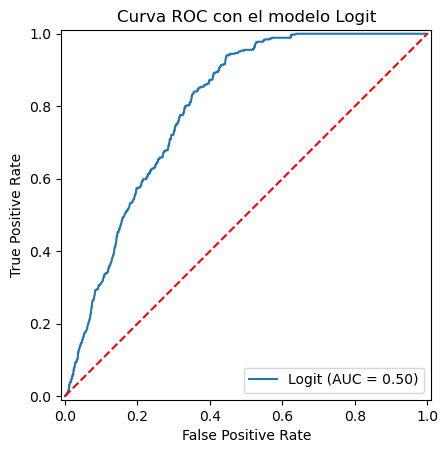

In [397]:
# Gráfico
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logit')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Curva ROC con el modelo Logit")
plt.savefig("Figuras punto 5.1.logit.png", bbox_inches='tight', dpi=300)   #GUARDO EL PNG
plt.show() 

### KNN

In [376]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [378]:
y_test_pred_knn_score = knn.predict_proba(X_test)[:,1]

# Clasificación con p > 0.5
y_test_pred_knn_conf = (y_test_pred_knn_score > 0.5).astype(int)

y_test_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("La exactitud del modelo es: %.3f" %accuracy_knn)  

# Matriz de confusion
print(pd.crosstab(index=y_test, columns=y_test_pred_knn_conf))



La exactitud del modelo es: 0.934
col_0     0    1
row_0           
0      8127  184
1       392   59


AUC: 0.55



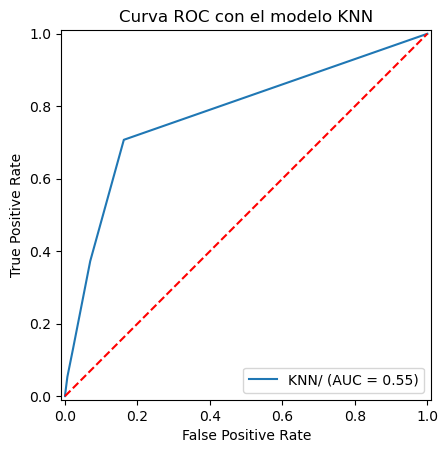

In [399]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_knn_score)

auc = roc_auc_score(y_test, y_test_pred_knn) 
print('AUC: %.2f' % auc)
print()
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='KNN/')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Curva ROC con el modelo KNN")
plt.savefig("Figuras punto 5.2.KNN.png", bbox_inches='tight', dpi=300)   #GUARDO EL PNG
plt.show() 

# Punto 6)

In [383]:
X6=norespondieron[['CH06','EDUC','CH04', 'SALARIO_SEMANAL']].fillna(0)
y6=norespondieron['desocupado']
y6=np.array(y6)

In [285]:
# Utilizo la regresión logit, pues su accuracy de testeo es más alta
y6_pred= log_reg.predict(X6)

In [293]:
print('La cantidad de desocupados predecidos son:', y6_pred.sum())

La cantidad de desocupados predecidos son: 0


In [301]:
print('La cantidad de desocupados encuestados son:', y6.sum())

La cantidad de desocupados encuestados son: 0


In [305]:
print('La proporción de las personas que no respondieron pero son y se predijeron como desocupadas es de 1' )

La proporción de las personas que no respondieron pero son y se predijeron como desocupadas es de 1
